In [63]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
n_task_per_file = 50
n_files = 10
base_dir = "vary_signa_G_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [65]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [66]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,1.000000,4.113978,1.515883,RRT,1.0
1,1.000000,7.115182,1.282581,Tree-Values,1.0
2,1.000000,3.423192,5.359974,RRT,2.0
3,0.750000,44.390558,5.130323,Tree-Values,2.0
4,0.833333,9.900483,35.264500,RRT,5.0
...,...,...,...,...,...
395,1.000000,14.843312,6.159099,Tree-Values,2.0
396,0.500000,6.864507,33.142864,RRT,5.0
397,1.000000,15.232064,35.758366,Tree-Values,5.0
398,1.000000,13.773452,128.431351,RRT,10.0


In [67]:
oper_char_df.index = range(oper_char_df.shape[0])

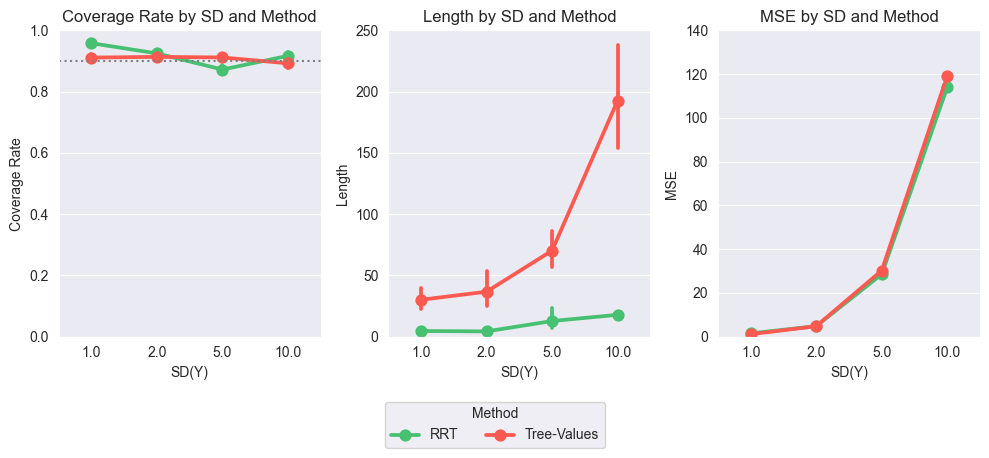

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=["#48c072", "#fc5a50"])
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,250)
    elif metric == "MSE":
        axes[i].set_ylim(0,140)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [79]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT,0.958314,4.658354,1.523876
1,1.0,Tree-Values,0.911321,inf,1.150109
2,2.0,RRT,0.924876,4.354346,4.840051
3,2.0,Tree-Values,0.913643,36.755306,4.804535
4,5.0,RRT,0.872210,12.802763,28.552139
5,5.0,Tree-Values,0.911690,70.264993,30.239196
6,10.0,RRT,0.917000,17.889609,114.016447
7,10.0,Tree-Values,0.892560,192.754232,119.167042


In [80]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [81]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.002
1,2.0,0.000
2,5.0,0.000
3,10.0,0.000
